# Coding exercises
Exercises 1-3 are thought exercises that don't require coding. 
Exercise 2: Is all data normally distributed? Explain why or why not. 
No, not all data is normally distributed. Some data can be skewed to the left or right, in which case the mean may not be a good indicator of the population average. There are also other types of distributions that data can follow, like Poisson (for arrivals) or exponential distribution. 
Exercise 3: It makes more sense to usethe median instead of the mean when the data is non-parametric, or non-normally distributed. 

## Exercise 4: Generate the data by running this cell
This will give you a list of numbers to work with in the remaining exercises.

In [231]:
import random
random.seed(0)
salaries = [round(random.random()*1000000, -3) for _ in range(100)]

## Exercise 5: Calculating statistics and verifying
### mean

In [232]:
#print("The sum is",sum(salaries))
#print("The number of salaries is ",len(salaries))

mean_salary = sum(salaries)/len(salaries)
print("The mean is",mean_salary)

import statistics
mean_st=statistics.mean(salaries)
print('The verified mean is %0.f'%mean_st)

The mean is 585690.0
The verified mean is 585690


### median

In [144]:
salaries.sort() # sort the salaries in ascending order
mid_num=int(len(salaries)/2) # calculate the middle number
check_even=int(mid_num%2) #check if your sample size is even
if check_even==0: #if even, take the two middle numbers:
    median_salary= (salaries[mid_num] + salaries[mid_num-1])/2
else: #if odd, use the middle number:
    median_salary= salaries[mid_num]
print("The median salary is", median_salary)
median_st=statistics.median(salaries)
print('The verified median is %0.f'%median_st)

The median salary is 589000.0
The verified median is 589000


### mode

In [145]:
import collections
salary_counts=[[x,salaries.count(x)] for x in set(salaries)]
salary_counts.sort(key = lambda x: x[1]) #sort counts based on second item in list
#print(salary_counts)
sal_mode_c=salary_counts[-1]
print('The mode is',sal_mode_c[0],'It appears',sal_mode_c[1],'times.')
mode_st=statistics.mode(salaries)
print('The verified mode is %0.f'%mode_st)

The mode is 477000.0 It appears 3 times.
The verified mode is 477000


### sample variance
Remember to use Bessel's correction.

In [146]:
import math
salary_var = sum((xi - mean_salary) ** 2 for xi in salaries) / (len(salaries)-1)
#print(salary_var)
print('The variance is %.0f.'%salary_var)
var_st=statistics.variance(salaries)
print('The verified variance is %0.f'%var_st)

The variance is 70664054444.
The verified variance is 70664054444


### sample standard deviation
Remember to use Bessel's correction.

In [147]:
salary_std= math.sqrt(salary_var)
#print(salary_std)
print('The standard deviation is %.0f.'%salary_std)
std_st=statistics.stdev(salaries)
print('The verified standard deviation is %0.f'%std_st)

The standard deviation is 265827.
The verified standard deviation is 265827


## Exercise 6: Calculating more statistics
### range

In [149]:
salary_range=salaries[-1]-salaries[0]
print('The range is %.0f.'%salary_range)

range_st=max(salaries)-min(salaries)
print('The range2 is %0.f'%range_st)

The range is 995000.
The verified range is 995000


### coefficient of variation

In [159]:
salary_CV=salary_std/mean_salary
print('The coefficient of variation is %.2f.'%salary_CV)

cv_st=statistics.stdev(salaries) / statistics.mean(salaries)
print('The verified CV is %.2f.'%cv_st)

The coefficient of variation is 0.45.
The verified CV is 0.45.


### interquartile range

In [179]:
print(mid_num) ## MY CODE WAS OFF....need to adjust
Q3_mid=int(len(salaries)-mid_num/2)
Q3=salaries[Q3_mid]
Q1_mid=int(mid_num/2)
Q1=salaries[Q1_mid]

#Lower_ind=len(salaries)*0.25
IQR=Q3-Q1
print('The interquartile range is %.0f.'%IQR)

from statistics import median
Quartile1 = median(salaries[:len(salaries)//2])
Quartile3 = median(salaries[(len(salaries)+1)//2:])
print('Inter-Quartile Range', Quartile3 - Quartile1)

from scipy.stats import iqr
IQR_st=iqr(salaries)
print('The verified IQR is %.0f.'%IQR_st)

50
The interquartile range is 420000.
Inter-Quartile Range 417500.0
The verified IQR is 413250.


### quartile coefficent of dispersion

In [176]:
QCD=(Q3-Q1)/(Q3+Q1)
print('The quartile coefficient of dispersion is %.2f.'%QCD)

The quartile coefficient of dispersion is 0.34.


## Exercise 7: Scaling data
### min-max scaling

Text(0.5, 1.0, 'Norm by min-max scaling')

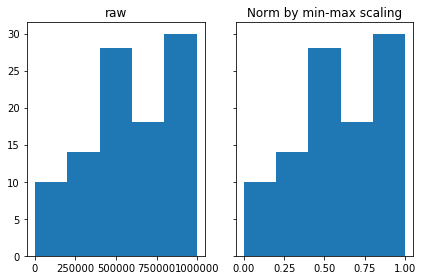

In [216]:
salary_scaled = [(number - min(salaries))/(max(salaries)-min(salaries)) for number in salaries]
#print(salary_scaled)

import matplotlib.pyplot as plt

n_bins=5
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(salaries, bins=n_bins)
axs[0].set_title('raw')
axs[1].hist(salary_scaled, bins=n_bins)
axs[1].set_title('Norm by min-max scaling')

### standardizing

Text(0.5, 1.0, 'z scores')

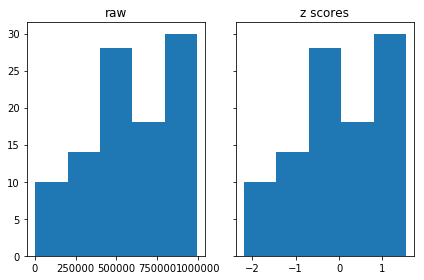

In [215]:
zscored_salaries = [(number - mean_salary)/(salary_std) for number in salaries]
#print(zscored_salaries)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(salaries, bins=n_bins)
axs[0].set_title('raw')
axs[1].hist(zscored_salaries, bins=n_bins)
axs[1].set_title('z scores')

## Exercise 8: Calculating covariance and correlation
### covariance

In [222]:
def covariance(x,y):
    mean_x=sum(x)/len(x)
    mean_y=sum(y)/len(y)
    
    sub_x= [xi-mean_x for xi in x]
    sub_y= [yi-mean_y for yi in y]
    
    num=sum([sub_x[i]*sub_y[i] for i in range(len(x))])
    covariance=num/(len(x)-1)
    return covariance
    
cov_scaled_zscored=covariance(salary_scaled, zscored_salaries)
print('The covariance is %0.2f.'%cov_scaled_zscored)

The covariance is 0.27.


### Pearson correlation coefficient ($\rho$)

In [224]:
def correlation(x,y):
    mean_x=sum(x)/len(x)
    mean_y=sum(y)/len(y)
    
    sub_x= [xi-mean_x for xi in x]
    sub_y= [yi-mean_y for yi in y]
    
    num= sum([sub_x[i]*sub_y[i] for i in range(len(x))])
    sub_xsq=sum([sub_x[i]**2 for i in range(len(x))])
    sub_ysq=sum([sub_y[i]**2 for i in range(len(y))])
    den= (sub_xsq**.5)*(sub_ysq**.5)
    correlation= num/den
    return correlation

corr_scaled_zscored=correlation(salary_scaled, zscored_salaries)
print('The correlation is %0.2f.'%corr_scaled_zscored)

The correlation is 1.00.
